In [3]:
import sys
import os
home=os.getcwd()
sys.path.append(home+'/Functions')
import pandas as pd
from ShowDF import *
import numpy as np

In [2]:
ResultsFolder=home+'/Results'
FileName=os.listdir(ResultsFolder)[3]
FullFileName=ResultsFolder+'/'+FileName
Data=pd.read_excel(FullFileName,index_col=0)

In [3]:
FileName=os.listdir(ResultsFolder)[0]
FullFileName=ResultsFolder+'/'+FileName
Data=pd.read_excel(FullFileName,index_col=0)
DataFilesNames=os.listdir(ResultsFolder)
FeaturesColumns=['RT','mz','mz_CI']
Columns=FeaturesColumns+DataFilesNames
NColumns=len(Columns)
NFeaturesZero=len(Data)
ZerosFeatMax=np.zeros((NFeaturesZero,NColumns))
SharedFeatures=pd.DataFrame(ZerosFeatMax.copy(),columns=Columns)
SharedFeatures[FeaturesColumns]=Data[[2,3,8]]

In [5]:
RT_tol=10
FileName=os.listdir(ResultsFolder)[10]
for FileName in os.listdir(ResultsFolder):
    FullFileName=ResultsFolder+'/'+FileName
    Data=pd.read_excel(FullFileName,index_col=0)
    Nfeatures=len(SharedFeatures)
    NewFeaturesList=[]
    for feature_id in Data.index:
        feature=Data.loc[feature_id]
        feature_mz=feature[3]
        feature_RT=feature[2]
        feature_mz_CI=feature[8]
        feature_max_mz=feature_mz+feature_mz_CI
        feature_min_mz=feature_mz-feature_mz_CI
        feature_max_RT=feature_RT+RT_tol
        feature_min_RT=feature_RT-RT_tol
        RT_filter=(SharedFeatures['RT']<feature_max_RT) & (SharedFeatures['RT']>feature_min_RT)
        mz_filter=((SharedFeatures['mz']-SharedFeatures['mz_CI'])<feature_max_mz)&((SharedFeatures['mz']+SharedFeatures['mz_CI'])>feature_min_mz)
        Filter=RT_filter&mz_filter
        if len(SharedFeatures[Filter])==0:
            NewFeaturesList.append([feature_RT,feature_mz,feature_mz_CI])
        else:
           # print('ths')
            SharedFeatures[FileName][Filter]=1
    NFeaturesZero=len(NewFeaturesList)
    if NFeaturesZero>0:
       # print(NFeaturesZero)
        ZerosFeatMax=np.zeros((NFeaturesZero,NColumns))
        NewFeatures=pd.DataFrame(ZerosFeatMax,columns=Columns)
        NewFeatures[FeaturesColumns]=NewFeaturesList
        NewFeatures[FileName]=1
        SharedFeatures=SharedFeatures.append(NewFeatures)
    #print(len(SharedFeatures))

In [79]:
SharedFeatures.to_excel('SharedFeatures.xlsx')

In [73]:
ShowDF(NewFeatures)

,RT,mz,mz_CI,MeOH_4.mzML.xlsx,12313.mzML.xlsx,12312.mzML.xlsx,11111.mzML.xlsx,13111.mzML.xlsx,12233.mzML.xlsx,blank .mzML.xlsx,11223.mzML.xlsx,12311.mzML.xlsx,21003.mzML.xlsx,13012.mzML.xlsx,12112.mzML.xlsx,11212.mzML.xlsx,12223.mzML.xlsx,11121.mzML.xlsx,MeOH_2.mzML.xlsx,13011.mzML.xlsx,13213.mzML.xlsx,11233.mzML.xlsx,21001.mzML.xlsx,13212.mzML.xlsx,13112.mzML.xlsx,13232.mzML.xlsx,11211.mzML.xlsx,12111.mzML.xlsx,13313.mzML.xlsx,21111_noSPE.mzML.xlsx,12113.mzML.xlsx,21131_noSPE.mzML.xlsx,12232.mzML.xlsx,13113.mzML.xlsx,13311.mzML.xlsx,11012.mzML.xlsx,12211.mzML.xlsx,12012.mzML.xlsx,MeOH_1.mzML.xlsx,13233.mzML.xlsx,11213.mzML.xlsx,21211_noSPE.mzML.xlsx,12222.mzML.xlsx,11232.mzML.xlsx,11013.mzML.xlsx,11011.mzML.xlsx,12221.mzML.xlsx,11231.mzML.xlsx,13013.mzML.xlsx,12011.mzML.xlsx,12213.mzML.xlsx,MeOH_3.mzML.xlsx,21002.mzML.xlsx,11221.mzML.xlsx,13211.mzML.xlsx,21221_noSPE.mzML.xlsx,11131.mzML.xlsx,13221.mzML.xlsx,13223.mzML.xlsx,12231.mzML.xlsx,13312.mzML.xlsx,12013.mzML.xlsx,MeOH.mzML.xlsx,13231.mzML.xlsx,13222.mzML.xlsx,12212.mzML.xlsx,11222.mzML.xlsx,21121_noSPE.mzML.xlsx
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [37]:
SharedFeatures.append(NewFeatures)

,RT,mz,mz_CI,test
0,0.886731,519.138372,0.006286,0.0
1,0.923962,445.119727,0.005531,0.0
2,0.960838,159.013008,0.000735,0.0
3,0.997412,172.992266,0.000872,0.0
4,1.325886,170.096370,0.000812,0.0
5,1.362429,144.997459,0.000639,0.0
6,1.400014,371.100982,0.004206,0.0
7,1.436583,593.157214,0.007671,0.0
8,1.768705,286.969435,0.002581,0.0
9,1.805951,223.063549,0.001422,0.0


In [86]:
#SharedFeatures=Data[[2,3,8]][:10]
RT_tol=10
#SharedFeatures.columns=FeaturesColumns
ShowDF((SharedFeatures.sort_values(by='mz'))[:50])
#print(SharedFeatures.loc[[5,7]])

,RT,mz,mz_CI,MeOH_4.mzML.xlsx,12313.mzML.xlsx,12312.mzML.xlsx,11111.mzML.xlsx,13111.mzML.xlsx,12233.mzML.xlsx,blank .mzML.xlsx,11223.mzML.xlsx,12311.mzML.xlsx,21003.mzML.xlsx,13012.mzML.xlsx,12112.mzML.xlsx,11212.mzML.xlsx,12223.mzML.xlsx,11121.mzML.xlsx,MeOH_2.mzML.xlsx,13011.mzML.xlsx,13213.mzML.xlsx,11233.mzML.xlsx,21001.mzML.xlsx,13212.mzML.xlsx,13112.mzML.xlsx,13232.mzML.xlsx,11211.mzML.xlsx,12111.mzML.xlsx,13313.mzML.xlsx,21111_noSPE.mzML.xlsx,12113.mzML.xlsx,21131_noSPE.mzML.xlsx,12232.mzML.xlsx,13113.mzML.xlsx,13311.mzML.xlsx,11012.mzML.xlsx,12211.mzML.xlsx,12012.mzML.xlsx,MeOH_1.mzML.xlsx,13233.mzML.xlsx,11213.mzML.xlsx,21211_noSPE.mzML.xlsx,12222.mzML.xlsx,11232.mzML.xlsx,11013.mzML.xlsx,11011.mzML.xlsx,12221.mzML.xlsx,11231.mzML.xlsx,13013.mzML.xlsx,12011.mzML.xlsx,12213.mzML.xlsx,MeOH_3.mzML.xlsx,21002.mzML.xlsx,11221.mzML.xlsx,13211.mzML.xlsx,21221_noSPE.mzML.xlsx,11131.mzML.xlsx,13221.mzML.xlsx,13223.mzML.xlsx,12231.mzML.xlsx,13312.mzML.xlsx,12013.mzML.xlsx,MeOH.mzML.xlsx,13231.mzML.xlsx,13222.mzML.xlsx,12212.mzML.xlsx,11222.mzML.xlsx,21121_noSPE.mzML.xlsx
350,121.352,100.075,0.000380449,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,69.9297,100.075,0.000528821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
43,210.306,100.076,0.000449645,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,87.9162,100.076,0.000448618,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,1,1,1,1,1,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0
320,113.487,100.076,0.000517543,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,24.5874,100.076,0.000349396,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
286,102.605,100.076,0.000349942,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
304,107.719,100.076,0.000485543,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,85.4976,100.112,0.000452937,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
375,110.348,100.112,0.000377553,0,1,1,1,1,0,0,1,1,0,1,1,0,0,0,0,1,1,1,1,1,0,1,1,1,1,0,1,0,1,0,0,1,1,1,0,1,0,0,1,1,1,0,1,1,1,1,1,0,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0


In [87]:
(SharedFeatures.sort_values(by='mz'))['mz'][:50]

350     100.075472
9       100.075498
43      100.075510
12      100.075520
320     100.075529
0       100.075538
286     100.075541
304     100.075546
3       100.111862
375     100.111872
412     100.111960
34      100.988267
159     101.008142
78      101.008153
186     101.008163
70      101.008164
63      101.008170
1753    101.008176
1873    101.008187
18      101.008199
73      101.008208
1815    101.008210
67      101.008225
2629    101.008226
875     101.023065
905     101.023130
118     101.023133
63      101.023173
42      101.023191
106     101.023199
206     101.059476
193     101.059489
164     101.059491
439     101.059496
941     101.059499
175     101.059506
174     101.059507
13      101.059508
382     101.059509
15      101.059510
179     101.059517
286     101.059522
100     101.059530
278     101.059532
150     101.059533
102     101.059537
79      101.059539
251     101.059539
95      101.059539
61      101.059539
Name: mz, dtype: float64

In [9]:
ShowDF(Data[:10])

,0,1,2,3,4,5,6,7,8,9,10,11
0,0,4,0.886731,519.138,0.00562011,11376.8,0.997859,9,0.00628589,12.1083,519.122,519.155
1,1,4,0.923962,445.12,0.00447008,8802.65,0.998602,8,0.00553062,12.425,445.106,445.133
2,2,4,0.960838,159.013,0.000956285,648.964,0.998597,15,0.000735018,4.62237,159.01,159.016
3,3,4,0.997412,172.992,0.00108366,636.408,0.998576,14,0.000872418,5.04311,172.989,172.996
4,4,9,1.32589,170.096,0.00105693,488.981,0.998621,15,0.000812373,4.77596,170.093,170.1
5,5,9,1.36243,144.997,0.000831237,306.568,0.998605,15,0.000638903,4.40631,144.995,145
6,6,9,1.40001,371.101,0.0033994,1195.58,0.998607,8,0.00420593,11.3336,371.091,371.111
7,7,4,1.43658,593.157,0.00685844,2247.57,0.997824,9,0.00767091,12.9323,593.137,593.178
8,8,14,1.76871,286.969,0.00230719,766.14,0.998495,9,0.00258051,8.99227,286.963,286.976
9,9,14,1.80595,223.064,0.00158634,375.953,0.998665,12,0.00142226,6.37603,223.059,223.068


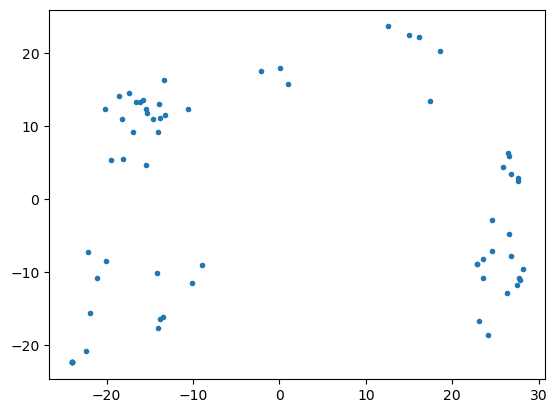

In [82]:
import numpy as np
from sklearn.decomposition import PCA
X=np.array(SharedFeatures[DataFilesNames]).T
#It's not normalized
pca = PCA()
pca.fit(X)
#print(pca.explained_variance_ratio_)
#print(pca.singular_values_)
M=pca.transform(X)
import matplotlib.pyplot as plt
plt.plot(M[:,0],M[:,1],'.')

In [4]:
import pandas as pd
from ShowDF import *
from sklearn.datasets import load_wine
wine = load_wine()
data = pd.DataFrame(data = wine.data, columns = wine.feature_names)
data.rename({
    "nonflavanoid_phenols": "nonflavanoid",
    "od280/od315_of_diluted_wines": "od280/od315"
}, axis = 1, inplace = True)
data["label"] = wine.target
X = data.drop("label", axis = 1)
y = data.label

In [5]:
ShowDF(data)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid,proanthocyanins,color_intensity,hue,od280/od315,proline,label
0,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.2,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.4,1050,0
2,13.16,2.36,2.67,18.6,101,2.8,3.24,0.3,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.5,16.8,113,3.85,3.49,0.24,2.18,7.8,0.86,3.45,1480,0
4,13.24,2.59,2.87,21,118,2.8,2.69,0.39,1.82,4.32,1.04,2.93,735,0
5,14.2,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,0
6,14.39,1.87,2.45,14.6,96,2.5,2.52,0.3,1.98,5.25,1.02,3.58,1290,0
7,14.06,2.15,2.61,17.6,121,2.6,2.51,0.31,1.25,5.05,1.06,3.58,1295,0
8,14.83,1.64,2.17,14,97,2.8,2.98,0.29,1.98,5.2,1.08,2.85,1045,0
9,13.86,1.35,2.27,16,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,0
